# **CSCI 4341	(BIG DATA ANALYTICS)**

> # **Group Project**

## Group members:  
**Mohamed Moubarak Mohamed Misbahou Mkouboi (1820705)**

**Umayma Ahhmed (1810704)**

**Malaika Pandit (1917494)**

**Mohammad Azwaan (1839075)**

In [4]:
#installing spark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install squarify

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#importing the libraries and creating a spark session
import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import squarify
import findspark
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as pxQ
findspark.init()
from pyspark.sql import functions as sf
from pyspark.sql import SparkSession
from pyspark.sql.types import *
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) 
spark

In [6]:
#load the datasets
df_temp = spark.read.csv("city_temperature.csv", header=True, inferSchema=True)
df_temp = df_temp.dropna(how='all')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as pxQ

In [16]:
# Importing dataset and taking as dataframe

dftemp=pd.read_csv("city_temperature.csv")
dftemp.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.



,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [6]:
df_temp.show()

+------+-------+-----+-------+-----+---+----+--------------+
|Region|Country|State|   City|Month|Day|Year|AvgTemperature|
+------+-------+-----+-------+-----+---+----+--------------+
|Africa|Algeria| null|Algiers|    1|  1|1995|          64.2|
|Africa|Algeria| null|Algiers|    1|  2|1995|          49.4|
|Africa|Algeria| null|Algiers|    1|  3|1995|          48.8|
|Africa|Algeria| null|Algiers|    1|  4|1995|          46.4|
|Africa|Algeria| null|Algiers|    1|  5|1995|          47.9|
|Africa|Algeria| null|Algiers|    1|  6|1995|          48.7|
|Africa|Algeria| null|Algiers|    1|  7|1995|          48.9|
|Africa|Algeria| null|Algiers|    1|  8|1995|          49.1|
|Africa|Algeria| null|Algiers|    1|  9|1995|          49.0|
|Africa|Algeria| null|Algiers|    1| 10|1995|          51.9|
|Africa|Algeria| null|Algiers|    1| 11|1995|          51.7|
|Africa|Algeria| null|Algiers|    1| 12|1995|          51.3|
|Africa|Algeria| null|Algiers|    1| 13|1995|          47.0|
|Africa|Algeria| null|Al

In [9]:
df_temp.printSchema()

root
 |-- Region: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- State: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- AvgTemperature: double (nullable = true)



In [10]:
df_temp.count()

2906327

In [11]:
df_temp.describe().show()

+-------+--------------------+-------+--------------------+-------+-----------------+------------------+------------------+------------------+
|summary|              Region|Country|               State|   City|            Month|               Day|              Year|    AvgTemperature|
+-------+--------------------+-------+--------------------+-------+-----------------+------------------+------------------+------------------+
|  count|             2906327|2906327|             1455337|2906327|          2906327|           2906327|           2906327|           2906327|
|   mean|                null|   null|                null|   null|6.469163311630109|15.716815760924355|2006.6239094912582|56.004920781453144|
| stddev|                null|   null|                null|   null|3.456489119292805| 8.800533627117657| 23.38225947703911| 32.12359394724333|
|    min|              Africa|Albania|Additional Territ...|Abidjan|                1|                 0|               200|             -99.0|

In [12]:
df_temp.dtypes

[('Region', 'string'),
 ('Country', 'string'),
 ('State', 'string'),
 ('City', 'string'),
 ('Month', 'int'),
 ('Day', 'int'),
 ('Year', 'int'),
 ('AvgTemperature', 'double')]

**Data cleaning includes removing columns that I will not need, eliminating duplicates, removing rows with null values**

In [13]:
#to ensure that all the values are unique in the dataframe
print(df_temp.count())
df_temp.dropDuplicates
print(df_temp.count())

2906327
2906327


In [14]:
#dropping columns that i will most likely not use from dataframe
df1=df_temp.drop('State')

In [15]:
#To remove any null values from the dataframe 
#print the number of rows before droppping null values
print(df_temp.count())
df_demo= df_temp.na.drop("any")
print(df_temp.count())

2906327
2906327


#*Data Visualization and Data Science Questions*# 

What is the total number of regions , countries, cities that are experiencing average temperature?

In [7]:
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number",
    value = dftemp['Region'].nunique(),
    domain = {'row': 0, 'column': 0},
    title = {'text': "Total number of Regions"}))

fig.add_trace(go.Indicator(
    mode = "number",
    value = dftemp['Country'].nunique(),
    domain = {'row': 0, 'column': 1},
    title = {'text': "Total number of Countries"}))

fig.add_trace(go.Indicator(
    mode = "number",
    value = dftemp['City'].nunique(),
    domain = {'row': 1, 'column': 2},
    title = {'text': "Total number of Cities"}))

fig.update_layout(
    grid = {'rows': 3, 'columns': 2, 'pattern': "independent"},
    template = {'data' : {'indicator': [{
        'title': {'text': "Speed"},
        'mode' : "number"}]
                         }})

fig.show()

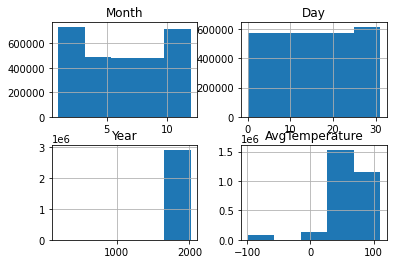

In [8]:
#df_temp.hist()
hist = dftemp.hist(bins=5)

Which number of month has the most probability of experiencing lowest average temperature?

In [23]:
# lowest average temperature
df_temp.agg({'AvgTemperature': 'min'}).show()

+-------------------+
|min(AvgTemperature)|
+-------------------+
|              -99.0|
+-------------------+



In [79]:
# highest average temperature
df_temp.agg({'AvgTemperature': 'max'}).show()

+-------------------+
|max(AvgTemperature)|
+-------------------+
|              110.0|
+-------------------+



In [31]:
df_temp.groupBy("Month").min("AvgTemperature")

Month,min(AvgTemperature)
12,-99.0
1,-99.0
6,-99.0
3,-99.0
5,-99.0
9,-99.0
4,-99.0
8,-99.0
7,-99.0
10,-99.0


What is the highest and the lowest average temperature Asia experienced in 2020?

In [109]:
#lowest
df_low = df_temp[['Region', 'Year', 'AvgTemperature']]
df_low.filter((df_low.Region == 'Asia') & (
    (df_low.Year == '2020') & 
  (df_low.AvgTemperature == -99.0))).show()

+------+----+--------------+
|Region|Year|AvgTemperature|
+------+----+--------------+
|  Asia|2020|         -99.0|
|  Asia|2020|         -99.0|
|  Asia|2020|         -99.0|
|  Asia|2020|         -99.0|
|  Asia|2020|         -99.0|
+------+----+--------------+



In [113]:
#highest
df_high = df_temp[['Region', 'Year', 'AvgTemperature']]
df_high.filter((df_high.Region == 'Asia') & (
    (df_high.Year == '2020') | 
  (df_high.AvgTemperature == 110.0))).show()

+------+----+--------------+
|Region|Year|AvgTemperature|
+------+----+--------------+
|  Asia|2020|          20.3|
|  Asia|2020|          27.1|
|  Asia|2020|          29.5|
|  Asia|2020|          32.4|
|  Asia|2020|          32.0|
|  Asia|2020|          32.9|
|  Asia|2020|          32.0|
|  Asia|2020|          28.4|
|  Asia|2020|          26.6|
|  Asia|2020|          32.5|
|  Asia|2020|          28.7|
|  Asia|2020|          25.6|
|  Asia|2020|          26.0|
|  Asia|2020|          21.3|
|  Asia|2020|          26.3|
|  Asia|2020|          25.0|
|  Asia|2020|          26.3|
|  Asia|2020|          26.2|
|  Asia|2020|          35.1|
|  Asia|2020|          28.7|
+------+----+--------------+
only showing top 20 rows



In [35]:
df_temp.groupBy("Region").min("AvgTemperature")

Region,min(AvgTemperature)
Europe,-99.0
Africa,-99.0
North America,-99.0
Middle East,-99.0
South/Central Ame...,-99.0
Asia,-99.0
Australia/South P...,-99.0


In [36]:
df_temp.groupBy("Region").max("AvgTemperature")

Region,max(AvgTemperature)
Europe,102.5
Africa,102.8
North America,107.7
Middle East,110.0
South/Central Ame...,97.4
Asia,103.7
Australia/South P...,96.8


What are the different countries from 2010 to 2015 in the African region?

In [10]:
df_q3 = dftemp[['Region', 'Country', 'Year']]
df_dif = df_temp[['Region', 'Country', 'Year']]
df_dif.filter((df_dif.Region == 'Africa') & (df_dif.Year.between(2010, 2015))).show(2000)

+------+-------+----+
|Region|Country|Year|
+------+-------+----+
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Algeria|2010|
|Africa|Al

In [ ]:
df_q3.plot.barh(x='Country', y='Year', title="the different countries from 2010 to 2015 in the African region");

plot.show(block=True)

What is the future results/analysis of the average temperature?

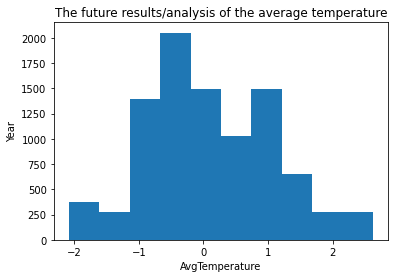

In [14]:
from matplotlib.pyplot import hist
dftemp = pd.DataFrame({
    '_id': np.random.randn(100),
    'total': 100 * np.random.rand()
})
hist(dftemp._id, weights=dftemp.total)
# Labels and Titles
plt.title('The future results/analysis of the average temperature')
plt.xlabel('AvgTemperature')
plt.ylabel('Year')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Year')

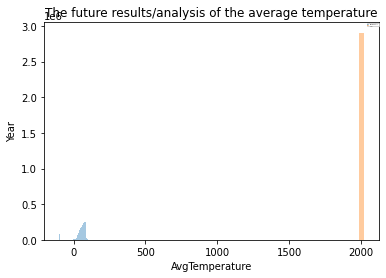

In [21]:
sns.distplot(dftemp['AvgTemperature'],  kde=False, label='AvgTemperature')
sns.distplot(dftemp['Year'],  kde=False,label='Year')

# Plot formatting
plt.legend(prop={'size': 0.5})
plt.title('The future results/analysis of the average temperature')
plt.xlabel('AvgTemperature')
plt.ylabel('Year')

What are the future countries that will have highest and lowest temperature?

In [25]:
df_q5 = df_temp[['Country', 'AvgTemperature']]
df_q5.filter( (
  (df_q5.AvgTemperature == 110.0))).show()

+-------+--------------+
|Country|AvgTemperature|
+-------+--------------+
| Kuwait|         110.0|
+-------+--------------+



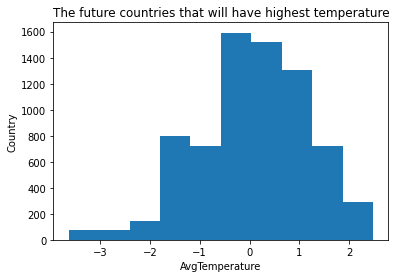

In [30]:
from matplotlib.pyplot import hist
df_q5 = pd.DataFrame({
    '_id': np.random.randn(100),
    'total': 100 * np.random.rand()
})
hist(df_q5._id, weights=df_q5.total)
# Labels and Titles
plt.title('The future countries that will have highest temperature')
plt.xlabel('AvgTemperature')
plt.ylabel('Country')
plt.show()

In [23]:
df_q6 = df_temp[['Country', 'AvgTemperature']]
df_q6.filter( (
  (df_q6.AvgTemperature == -99.0))).show()

+-------+--------------+
|Country|AvgTemperature|
+-------+--------------+
|Algeria|         -99.0|
|Algeria|         -99.0|
|Algeria|         -99.0|
|Algeria|         -99.0|
|Algeria|         -99.0|
|Algeria|         -99.0|
|Algeria|         -99.0|
|Algeria|         -99.0|
|Algeria|         -99.0|
|Algeria|         -99.0|
|Algeria|         -99.0|
|Algeria|         -99.0|
|Algeria|         -99.0|
|Algeria|         -99.0|
|Algeria|         -99.0|
|Algeria|         -99.0|
|Algeria|         -99.0|
|Algeria|         -99.0|
|Algeria|         -99.0|
|Algeria|         -99.0|
+-------+--------------+
only showing top 20 rows



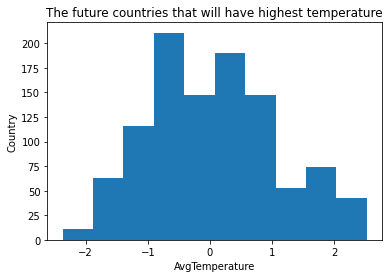

In [31]:
from matplotlib.pyplot import hist
df_q6 = pd.DataFrame({
    '_id': np.random.randn(100),
    'total': 100 * np.random.rand()
})
hist(df_q6._id, weights=df_q6.total)
# Labels and Titles
plt.title('The future countries that will have highest temperature')
plt.xlabel('AvgTemperature')
plt.ylabel('Country')
plt.show()

Which are the top cities experiencing average temperature in 2005?

In [107]:
df_q7 = df_temp[['City', 'Year', 'AvgTemperature']]
df_q7.filter( (
    (df_q7.Year == '2005') 
  )).show()

+-------+----+--------------+
|   City|Year|AvgTemperature|
+-------+----+--------------+
|Algiers|2005|          50.3|
|Algiers|2005|          46.7|
|Algiers|2005|          47.4|
|Algiers|2005|          48.1|
|Algiers|2005|          45.4|
|Algiers|2005|          43.1|
|Algiers|2005|          43.4|
|Algiers|2005|          44.2|
|Algiers|2005|          42.7|
|Algiers|2005|          45.0|
|Algiers|2005|          44.2|
|Algiers|2005|          43.7|
|Algiers|2005|          49.0|
|Algiers|2005|          51.0|
|Algiers|2005|          44.5|
|Algiers|2005|          43.4|
|Algiers|2005|          43.7|
|Algiers|2005|          46.3|
|Algiers|2005|          56.9|
|Algiers|2005|          56.9|
+-------+----+--------------+
only showing top 20 rows



Which are the top regions experiencing lowest temperature in 2015?

In [108]:
df_q8 = df_temp[['Region', 'Year', 'AvgTemperature']]
df_q8.filter( (
    (df_q8.Year == '2015') &
  (df_q8.AvgTemperature == -99.0))).show()

+------+----+--------------+
|Region|Year|AvgTemperature|
+------+----+--------------+
|Africa|2015|         -99.0|
|Africa|2015|         -99.0|
|Africa|2015|         -99.0|
|Africa|2015|         -99.0|
|Africa|2015|         -99.0|
|Africa|2015|         -99.0|
|Africa|2015|         -99.0|
|Africa|2015|         -99.0|
|Africa|2015|         -99.0|
|Africa|2015|         -99.0|
|Africa|2015|         -99.0|
|Africa|2015|         -99.0|
|Africa|2015|         -99.0|
|Africa|2015|         -99.0|
|Africa|2015|         -99.0|
|Africa|2015|         -99.0|
|Africa|2015|         -99.0|
|Africa|2015|         -99.0|
|Africa|2015|         -99.0|
|Africa|2015|         -99.0|
+------+----+--------------+
only showing top 20 rows



Which countries are mostly affected by high temperatures during the month 12?

In [116]:
df_q9 = df_temp[['Country', 'Month', 'AvgTemperature']]
df_q9.filter( (
    (df_q9.Month == '12') |
  (df_q9.AvgTemperature == 110.0))).show()

+-------+-----+--------------+
|Country|Month|AvgTemperature|
+-------+-----+--------------+
|Algeria|   12|          57.3|
|Algeria|   12|          55.9|
|Algeria|   12|          55.1|
|Algeria|   12|          57.7|
|Algeria|   12|          53.8|
|Algeria|   12|          51.8|
|Algeria|   12|          59.3|
|Algeria|   12|          58.2|
|Algeria|   12|          53.2|
|Algeria|   12|          52.6|
|Algeria|   12|          52.9|
|Algeria|   12|          52.1|
|Algeria|   12|          54.4|
|Algeria|   12|          52.3|
|Algeria|   12|          62.7|
|Algeria|   12|          62.2|
|Algeria|   12|          55.6|
|Algeria|   12|          54.1|
|Algeria|   12|          52.1|
|Algeria|   12|          58.1|
+-------+-----+--------------+
only showing top 20 rows



What is the temperature range of Europe from 2017 to 2019?

In [135]:
df_q10 = df_temp[['Region', 'Year', 'AvgTemperature']]
df_q10.filter (
    (df_q10.Region == 'Europe') &
  (df_q10.Year.between(2017, 2019))).show()




+------+----+--------------+
|Region|Year|AvgTemperature|
+------+----+--------------+
|Europe|2017|          35.9|
|Europe|2017|          44.4|
|Europe|2017|          45.3|
|Europe|2017|          46.5|
|Europe|2017|          44.6|
|Europe|2017|          33.6|
|Europe|2017|          26.4|
|Europe|2017|          24.9|
|Europe|2017|          26.9|
|Europe|2017|          25.8|
|Europe|2017|          29.4|
|Europe|2017|          32.4|
|Europe|2017|          43.9|
|Europe|2017|          43.7|
|Europe|2017|          40.6|
|Europe|2017|          42.8|
|Europe|2017|          44.3|
|Europe|2017|          45.4|
|Europe|2017|          44.6|
|Europe|2017|          40.8|
+------+----+--------------+
only showing top 20 rows



How are average temperatures classified in the different regions in the months of May and June?

In [141]:
df_q11 = df_temp[['Region', 'Month', 'AvgTemperature']]
df_q11.filter (
    (df_q11.Month.between(5, 6))).show()

+------+-----+--------------+
|Region|Month|AvgTemperature|
+------+-----+--------------+
|Africa|    5|          60.4|
|Africa|    5|          59.7|
|Africa|    5|          61.5|
|Africa|    5|          63.9|
|Africa|    5|          63.7|
|Africa|    5|          66.7|
|Africa|    5|          75.1|
|Africa|    5|          77.2|
|Africa|    5|          74.6|
|Africa|    5|          69.4|
|Africa|    5|          67.4|
|Africa|    5|          68.2|
|Africa|    5|          63.3|
|Africa|    5|          60.4|
|Africa|    5|          65.6|
|Africa|    5|          68.9|
|Africa|    5|          68.4|
|Africa|    5|          70.1|
|Africa|    5|          70.3|
|Africa|    5|          68.0|
+------+-----+--------------+
only showing top 20 rows



## References

https://www.tutorialspoint.com/pyspark/index.htm#:~:text=Apache%20Spark%20is%20written%20in,are%20able%20to%20achieve%20this

https://plotly.com/python/?fbclid=IwAR06XyIz95fJc4ahdwCgrt458o0n3UN1xJ8EK5vE11XG1qWIJgLk8b7bmsA

https://sparkbyexamples.com/pyspark/pyspark-groupby-explained-with-example/